**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: <u>Miguel Ángel Jiménez Ortiz</u>

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [519]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [520]:
from google.colab import drive
drive.mount('/content/drive')

route = "./drive/MyDrive/DSFiles"
happiness = pd.read_csv(f"{route}/happiness_report.csv")
happiness

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [521]:
mexico = happiness[happiness['Country or region'] == "Mexico"]
mexico.set_index("Country or region", inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Score min.: 2.9
Score max.: 7.8
Score range: 5.0
Bin step: 0.5


Text(Country or region
Mexico    6.595
Name: Score, dtype: float64, 0, 'MEX')

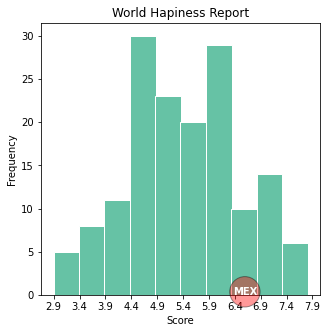

In [522]:
score = happiness["Score"].round(1)
score_min = score.min().round(1)
score_max = score.max().round(1)
score_range = (score_max-score_min).round()
print(f"Score min.: {score_min}\n"
      f"Score max.: {score_max}\n"
      f"Score range: {score_range}")
bins_qty = 10
bins_step = score_range/bins_qty
print(f"Bin step: {bins_step}")

sns.set_palette("Set2")
score.plot(kind="hist", bins=bins_qty, width=bins_step, figsize=((bins_qty-5),5), edgecolor="white")
plt.xlabel("Score")
plt.title("World Hapiness Report")
plt.xticks(np.arange(score_min, score.max()+bins_step, bins_step).round(1))
props_bbox = {"boxstyle": "circle",
              "facecolor": "red",
              "alpha": 0.4,
              }
plt.text(x=mexico["Score"], y=0, s="MEX", bbox=props_bbox, color="white", fontweight="bold", horizontalalignment="center")

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.25, Country or region
Mexico    0.90405
Name: Healthy life expectancy, dtype: float64, 'MEX')

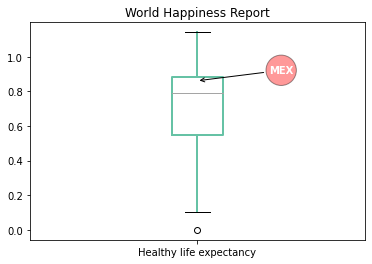

In [523]:
assigned_props= dict(linewidth=2.0, color="#66C2A5")
happiness.boxplot("Healthy life expectancy", whiskerprops=assigned_props, boxprops=assigned_props)
plt.title("World Happiness Report")
plt.grid(False)
props_bbox = {"boxstyle": "circle",
              "facecolor": "red",
              "alpha": 0.4,
              }
plt.annotate("MEX", xy=(1,mexico["Healthy life expectancy"]),xytext=(1.25,mexico["Healthy life expectancy"]*1.05),arrowprops=dict(arrowstyle='->'), bbox=props_bbox, color="white", fontweight="bold", horizontalalignment="center")

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

In [524]:
mexico_factors = mexico.drop(columns=["Overall rank", "Score"], axis=1).transpose()
mexico_factors = mexico_factors.rename(columns={"Mexico": "Factors"})
mexico_factors

Country or region,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


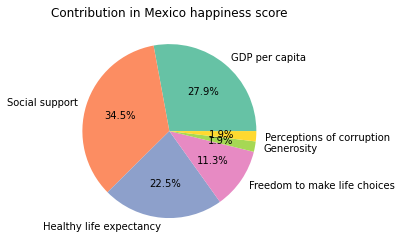

In [525]:
mexico_factors.plot.pie(y="Factors", labels=mexico_factors.index, autopct="%1.1f%%", legend=None, ylabel="", title="Contribution in Mexico happiness score")

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

In [526]:
happiest_country = happiness[happiness["Overall rank"] == 1]["Country or region"].values[0]
saddest_country = happiness[happiness["Overall rank"] == (len(happiness))]["Country or region"].values[0]

happiness_sample = happiness[(happiness["Country or region"] == happiest_country) | (happiness["Country or region"] == saddest_country) | (happiness["Country or region"] == "Mexico") | (happiness["Country or region"] == "Canada") | (happiness["Country or region"] == "Iran")]
happiness_sample = happiness_sample.set_index("Country or region").drop(columns=["Overall rank", "Score"])
happiness_sample

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Canada,1.365,1.505,1.039,0.584,0.285,0.308
Mexico,1.070,1.323,0.861,0.433,0.074,0.073
Iran,1.100,0.842,0.785,0.305,0.270,0.125
South Sudan,0.306,0.575,0.295,0.010,0.202,0.091


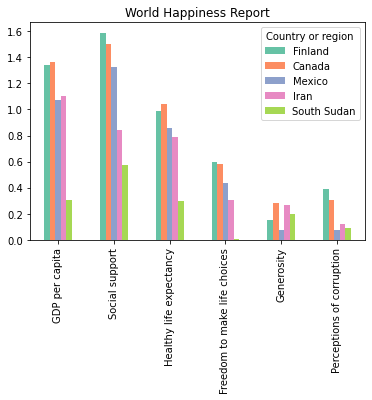

In [527]:
happiness_sample.transpose().plot(kind="bar", title="World Happiness Report")

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

Text(0.5, 0.93, 'Contribution in happiness score')

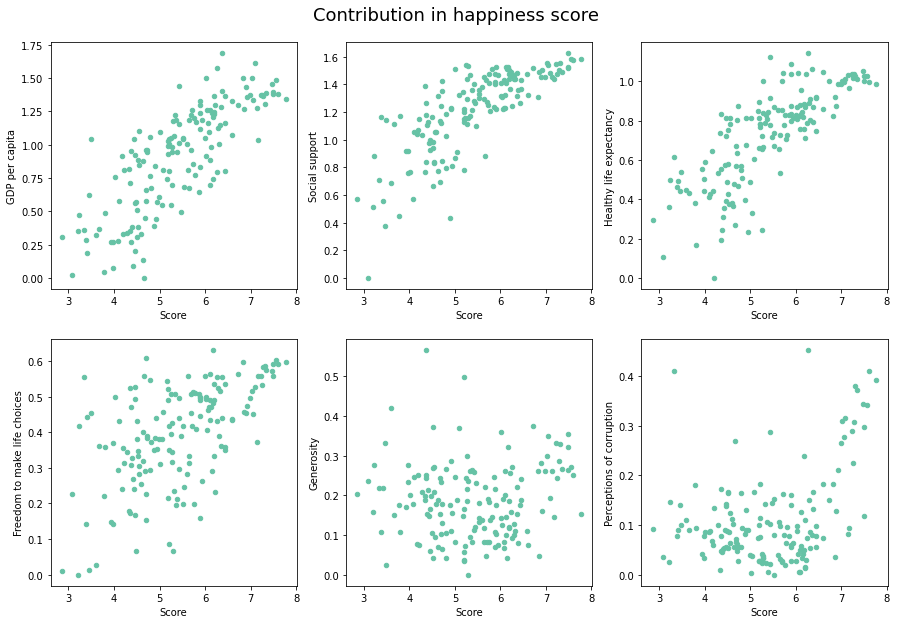

In [538]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

happiness.plot(kind="scatter", x="Score", y="GDP per capita", ax=axs[0,0], color="#66C2A5")
happiness.plot(kind="scatter", x="Score", y="Social support", ax=axs[0,1], color="#66C2A5")
happiness.plot(kind="scatter", x="Score", y="Healthy life expectancy", ax=axs[0,2], color="#66C2A5")
happiness.plot(kind="scatter", x="Score", y="Freedom to make life choices", ax=axs[1,0], color="#66C2A5")
happiness.plot(kind="scatter", x="Score", y="Generosity", ax=axs[1,1], color="#66C2A5")
happiness.plot(kind="scatter", x="Score", y="Perceptions of corruption", ax=axs[1,2], color="#66C2A5")

fig.suptitle("Contribution in happiness score", y=0.93, fontsize=18)

9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

Text(0.5, 1.0, 'Correlation Heatmap')

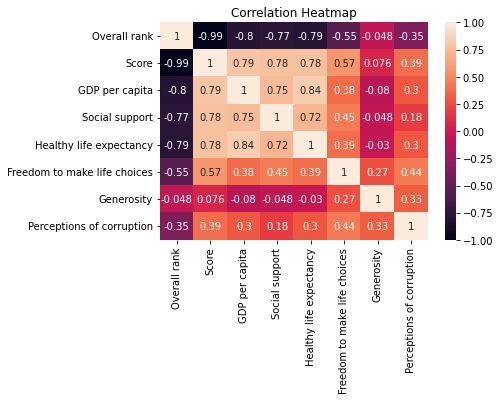

In [529]:
heatmap = sns.heatmap(happiness.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap')

10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

In [530]:
metadata = pd.read_csv(f"{route}/Metadata.csv")
metadata = metadata.rename(columns={"TableName": "Country or region"})
# metadata

In [531]:
happiness_combined = happiness.merge(metadata, on="Country or region")
happiness_byregion_mean = happiness_combined[["Region", "Score"]].groupby("Region").mean().sort_values(by="Region")
happiness_byregion_mean

,Score
Region,
East Asia & Pacific,5.658769
Europe & Central Asia,6.104174
Latin America & Caribbean,6.007579
Middle East & North Africa,5.757429
North America,7.085000
South Asia,4.526857
Sub-Saharan Africa,4.260000


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

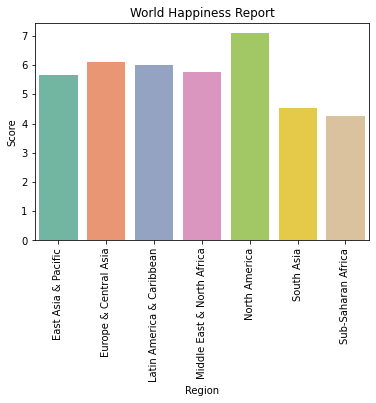

In [532]:
happiness_region = sns.barplot(x=happiness_byregion_mean.index, y="Score", data=happiness_byregion_mean)
happiness_region.set(title="World Happiness Report")
plt.xticks(rotation=90)